In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [18]:
data_train_path = "C:\\Users\\Aarav Phutane\\Documents\\Aarav Phutane\\Image_classification\\Fruits_Vegetables\\train"
data_test_path = "C:\\Users\\Aarav Phutane\\Documents\\Aarav Phutane\\Image_classification\\Fruits_Vegetables\\test"
data_val_path = "C:\\Users\\Aarav Phutane\\Documents\\Aarav Phutane\\Image_classification\\Fruits_Vegetables\\validation"

In [19]:
img_width = 180
img_height = 180

In [20]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


In [21]:
data_cat = data_train.class_names

In [41]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [22]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 351 files belonging to 36 classes.


In [23]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


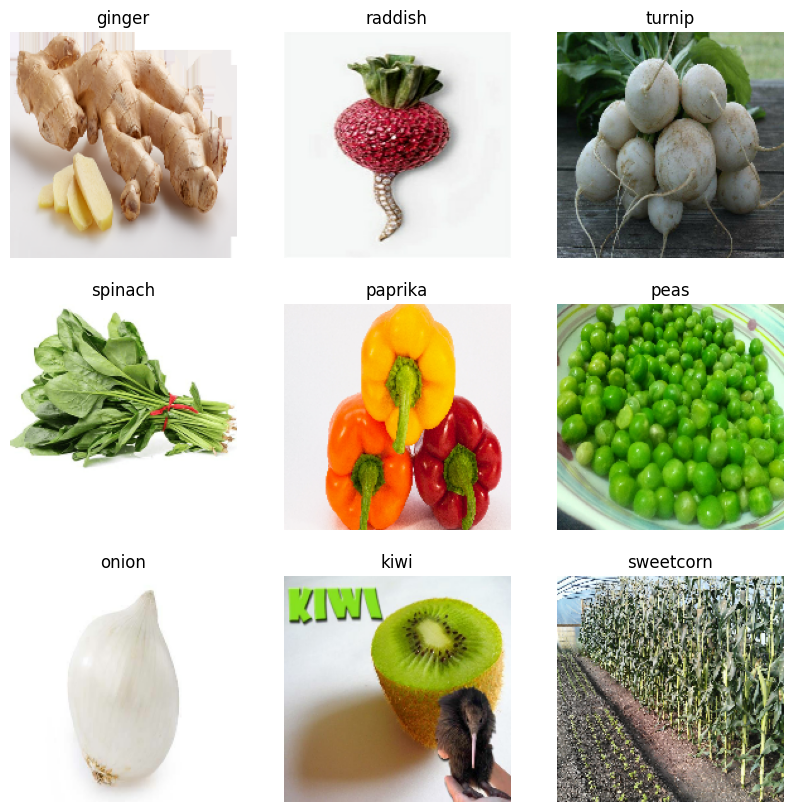

In [24]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [25]:
from tensorflow.keras.models import Sequential

In [26]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [27]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [28]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [29]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 138ms/step - accuracy: 0.0753 - loss: 3.5881 - val_accuracy: 0.3476 - val_loss: 2.3754
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 14s 137ms/step - accuracy: 0.2557 - loss: 2.5832 - val_accuracy: 0.6011 - val_loss: 1.4393
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 13s 124ms/step - accuracy: 0.4406 - loss: 1.9403 - val_accuracy: 0.7863 - val_loss: 0.8932
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 13s 129ms/step - accuracy: 0.6079 - loss: 1.3749 - val_accuracy: 0.8405 - val_loss: 0.6137
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 13s 131ms/step - accuracy: 0.7114 - loss: 0.9664 - val_accuracy: 0.8889 - val_loss: 0.5463
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 14s 137ms/step - accuracy: 0.8549 - loss: 0.5188 - val_accuracy: 0.9402 - val_loss: 0.3342
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 13s 135ms/step - accuracy: 0.9185 - loss: 0.3083 - val_accuracy: 0.9487 - val_loss: 0.3956
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.9469 - loss: 0.2333 - val_accu

Text(0.5, 1.0, 'Loss')

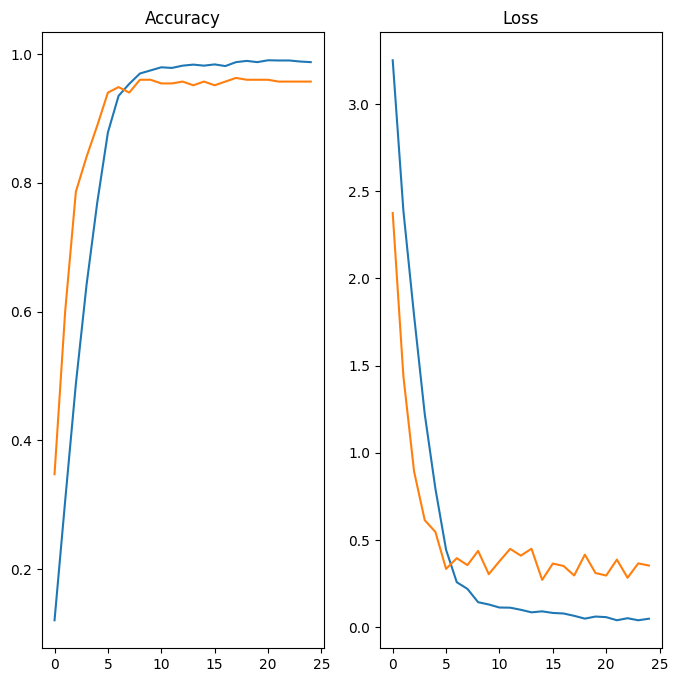

In [30]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [36]:
image = 'Apple.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [37]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


In [38]:
score = tf.nn.softmax(predict)

In [39]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is garlic with accuracy of 100.00


In [40]:
model.save('Image_classify.keras')